# Project 4 : Text Classification with sklearn

### Reading Dataset

In [2]:
import pandas as pd
df_reviews = pd.read_csv(r'C:\Users\user\OneDrive\Documents\IMDB Dataset.csv')

In [4]:
# Take a sample of 10000 rows to make processing faster
# 9000 positive
df_positive = df_reviews[df_reviews['sentiment'] == 'positive'][:9000]
# 1000 negative
df_negative = df_reviews[df_reviews['sentiment'] == 'negative'][:1000]

In [5]:
df_reviews_imb = pd.concat([df_positive , df_negative])

In [7]:
# The data is imbalance (as 9k positive and 1k negative)
df_reviews_imb

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
...,...,...
2000,Stranded in Space (1972) MST3K version - a ver...,negative
2005,"I happened to catch this supposed ""horror"" fli...",negative
2007,waste of 1h45 this nasty little film is one to...,negative
2010,Warning: This could spoil your movie. Watch it...,negative


In [8]:
df_reviews_imb.value_counts('sentiment')

sentiment
positive    9000
negative    1000
Name: count, dtype: int64

#### Dealing with Imbalanced Classes

<Axes: xlabel='sentiment'>

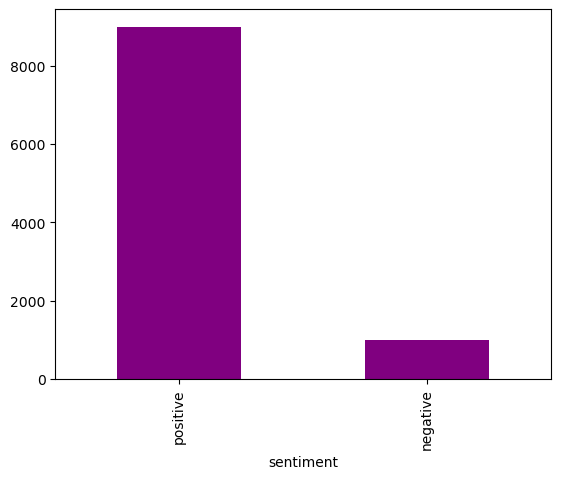

In [10]:
df_reviews_imb.value_counts('sentiment').plot(kind='bar' , color='purple')

#### Balancing Data with .sample()

In [13]:
length_negative = len(df_reviews_imb[df_reviews_imb['sentiment'] == 'negative'])
df_reviews_positive = df_reviews_imb[df_reviews_imb['sentiment'] == 'positive'].sample(n = length_negative)
df_reviews_negative = df_reviews_imb[df_reviews_imb['sentiment'] == 'negative'] 

In [18]:
df_reviews_bal = pd.concat([df_reviews_positive , df_reviews_negative])

In [24]:
df_reviews_bal.reset_index(drop=True , inplace=True)

In [26]:
df_reviews_bal

,index,review,sentiment
0,0,I first saw The Couch Trip (1988)on late night...,positive
1,1,Nicolas Roeg's projects are variable to say th...,positive
2,2,"Highly enjoyable, very imaginative, and filmic...",positive
3,3,this movie is so complex that it can be given ...,positive
4,4,"Once again, Doctor Who delivers the goods by t...",positive
...,...,...,...
1995,1995,Stranded in Space (1972) MST3K version - a ver...,negative
1996,1996,"I happened to catch this supposed ""horror"" fli...",negative
1997,1997,waste of 1h45 this nasty little film is one to...,negative
1998,1998,Warning: This could spoil your movie. Watch it...,negative


#### Balancing Data with RandomUnderSampler 

In [1]:
import pandas as pd
df_reviews = pd.read_csv(r'C:\Users\user\OneDrive\Documents\IMDB Dataset.csv')

In [2]:
df_positive = df_reviews[df_reviews['sentiment'] == 'positive'][:9000]
df_negative = df_reviews[df_reviews['sentiment'] == 'negative'][:1000]

In [3]:
df_reviews_imb = pd.concat([df_positive , df_negative])

In [4]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
df_reviews_bal , df_reviews_bal['sentiment'] = rus.fit_resample(df_reviews_imb[['review']] , df_reviews_imb['sentiment'])

In [5]:
df_reviews_bal.value_counts('sentiment')

sentiment
negative    1000
positive    1000
Name: count, dtype: int64

#### Splitting Data into train and test

In [6]:
# import train_test_split
from sklearn.model_selection import train_test_split
train , test = train_test_split(df_reviews_bal , test_size=0.33 , random_state=43 )

In [7]:
train

,review,sentiment
769,A plot that fizzled and reeked of irreconcilab...,negative
1917,"Teamo Supremo are three kids, consisting of th...",negative
1136,"Wasted is just that, a waste of time. MTV is c...",negative
847,"STMD! is not a terrible movie, but it IS quite...",negative
761,I think my summary says it all. This MTV-ish a...,negative
...,...,...
525,Im the type of person who always goes 2 to hor...,negative
8810,"Excellent story, wonderful acting, amazing pro...",positive
485,this film is quite simply one of the worst fil...,negative
12060,"Weak, fast and multicolor,this is the Valvolin...",positive


In [8]:
test

,review,sentiment
4506,I remember this game. It was always sitting on...,positive
9869,This is an excellent movie that tackles the is...,positive
574,Do you ever wonder what is the worst movie eve...,negative
13906,"More exciting than the Wesley Snipes film, and...",positive
7565,"This is definitely a touching movie, and a gre...",positive
...,...,...
1283,"Good movies are original, some leave a message...",negative
301,Serum is about a crazy doctor that finds a ser...,negative
1428,"waste of my life, .... the director should be ...",negative
17693,"Dead or Alive: Final, the movie that supposedl...",positive


In [9]:
# Selecting dependent and independent variable for test , train
train_x , train_y = train['review'] , train['sentiment']
test_x , test_y = test['review'] , test['sentiment']

In [10]:
train_x

769      A plot that fizzled and reeked of irreconcilab...
1917     Teamo Supremo are three kids, consisting of th...
1136     Wasted is just that, a waste of time. MTV is c...
847      STMD! is not a terrible movie, but it IS quite...
761      I think my summary says it all. This MTV-ish a...
                               ...                        
525      Im the type of person who always goes 2 to hor...
8810     Excellent story, wonderful acting, amazing pro...
485      this film is quite simply one of the worst fil...
12060    Weak, fast and multicolor,this is the Valvolin...
11301    Refreshing `lost' gem! Featuring effective dia...
Name: review, Length: 1340, dtype: object

In [11]:
train_y.value_counts()

sentiment
positive    671
negative    669
Name: count, dtype: int64

## Text Representation (Bag of Words)

#### Count Vectorizer 

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
text = ["I love writing code in Python. I love Python code" , 
        "I hate writing code in Java. I hate Java code"]
df = pd.DataFrame({'review':['review1' , 'review2'] , 'text':text})
cv = CountVectorizer(stop_words='english')
cv_matrix = cv.fit_transform(df['text']) 

In [14]:
df_dtm = pd.DataFrame(cv_matrix.toarray() , index=df['review'].values , columns = cv.get_feature_names_out())

In [15]:
df_dtm

,code,hate,java,love,python,writing
review1,2,0,0,2,2,1
review2,2,2,2,0,0,1


### Tfidf

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
text = ["I love writing code in Python. I love Python code" , 
        "I hate writing code in Java. I hate Java code"]
df = pd.DataFrame({'review':['review1' , 'review2'] , 'text':text})
tfidf = TfidfVectorizer(stop_words='english' , norm=None)
tfidf_matrix = tfidf.fit_transform(df['text'])

In [17]:
 pd.DataFrame(tfidf_matrix.toarray() , index=df['review'].values , columns = tfidf.get_feature_names_out())

,code,hate,java,love,python,writing
review1,2.0,0.00000,0.00000,2.81093,2.81093,1.0
review2,2.0,2.81093,2.81093,0.00000,0.00000,1.0


#### Turning our text Data into Numeric Vectors

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
train_x_vector = tfidf.fit_transform(train_x)

In [14]:
train_x_vector

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 120718 stored elements and shape (1340, 20752)>

In [20]:
pd.DataFrame.sparse.from_spmatrix(train_x_vector  , 
                                    index = train_x.index , 
                                     columns =  tfidf.get_feature_names_out())

,00,000,007,01,01pm,02,04,06,08,10,...,zooming,zooms,zzzzzzzzzzzzzzzzzz,æon,élan,émigré,être,ísnt,île,ïn
769,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1136,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
847,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
761,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8810,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
485,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12060,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
train_x_vectors = tfidf.fit_transform(train_x)

In [17]:
test_x_vector = tfidf.transform(test_x)

In [18]:
test_x_vector

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 51825 stored elements and shape (660, 20752)>

### Model Selection

#### Support Vector Machines (SVM)

In [21]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear')
svc.fit(train_x_vector , train_y)

SVC(kernel='linear')

In [28]:
print(svc.predict(tfidf.transform(['A Good Movie'])))
print(svc.predict(tfidf.transform(['An Excellent Movie'])))
print(svc.predict(tfidf.transform(['I did not like the  Movie at all'])))

['positive']
['positive']
['negative']


#### Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()
dec_tree.fit(train_x_vector , train_y)

DecisionTreeClassifier()

#### Naive Bayes

In [23]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_x_vector.toarray() , train_y)

GaussianNB()

#### Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(train_x_vector , train_y)

LogisticRegression()

### Model Evaluation 

#### Confusion Matrix

In [25]:
from sklearn.metrics import confusion_matrix 
confusion_matrix(test_y ,
                  svc.predict(test_x_vector) , 
                   labels =['positive' , 'negative'])

array([[278,  51],
       [ 68, 263]])

### Mean Accuracy

In [27]:
# Calculate the accuracy of all models
print(svc.score(test_x_vector , test_y))
print(dec_tree.score(test_x_vector , test_y))
print(gnb.score(test_x_vector.toarray() , test_y))
print(log_reg.score(test_x_vector , test_y))

0.8196969696969697
0.6575757575757576
0.6257575757575757
0.8287878787878787


### F1 Score

In [30]:
from sklearn.metrics import f1_score
f1_score(test_y , svc.predict(test_x_vector),
          labels=['positive', 'negative'] , 
          average=None)

array([0.8237037 , 0.81550388])

### Classification Report

In [31]:
from sklearn.metrics import classification_report
print(classification_report(test_y , svc.predict(test_x_vector) , 
                            labels =['positive' , 'negative'])
)

              precision    recall  f1-score   support

    positive       0.80      0.84      0.82       329
    negative       0.84      0.79      0.82       331

    accuracy                           0.82       660
   macro avg       0.82      0.82      0.82       660
weighted avg       0.82      0.82      0.82       660



### Tuning the Model

#### GridSearchCV

In [33]:
from sklearn.model_selection import GridSearchCV
parameters = {'C':[1 , 4 , 8 , 16 , 32] , 'kernel':['linear' , 'rbf']}
svc = SVC()
svc_grid = GridSearchCV(svc , parameters , cv=5)
svc_grid.fit(train_x_vector , train_y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 4, 8, 16, 32], 'kernel': ['linear', 'rbf']})

In [35]:
svc_grid.best_params_

{'C': 4, 'kernel': 'rbf'}

In [36]:
svc_grid.best_estimator_

SVC(C=4)